In [7]:
#Variance threshold
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv('fruit_data.csv')
df = pd.DataFrame(data)


cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])


scaler = StandardScaler() ## Z-score normalization
# fit and transform the data
normalized_data = scaler.fit_transform(df)
# create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)
# print dataframe
#df  
X = df.to_numpy()
X1 = X[:, 3:7]   ## features  : X -> x1, x2,.....xn
Y1 = X[:,1]      # Output : Y
# Now split the data into Training and Testing dataset
# Routine method for splitting numpy data
# Now split the data into Training and Testing dataset
# Routine method for splitting numpy data
X_train, X_test ,Y_train, Y_test = train_test_split(X1,Y1,test_size=0.33 , random_state= 42)

selector = VarianceThreshold(threshold=0.01) # Variance threshold 
sel = selector.fit(normalized_df)
sel_index = sel.get_support()
df_wine_norm_vt = normalized_df.iloc[:, sel_index]
print(df_wine_norm_vt.columns)
#['fixed acidity', 'volatile acidity', 'total sulfur dioxide', 'pH', 'alcohol']

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')


In [10]:
#Mutual info classification
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_selection import VarianceThreshold,SelectKBest, SelectPercentile, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# import category


data = pd.read_csv('fruit_data.csv')
df = pd.DataFrame(data)


cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])


scaler = StandardScaler() ## Z-score normalization
# fit and transform the data
normalized_data = scaler.fit_transform(df)
# create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)
# print dataframe
#df  
X = df.to_numpy()
X1 = X[:, 3:7]   ## features  : X -> x1, x2,.....xn
Y1 = X[:,1]      # Output : Y
# Now split the data into Training and Testing dataset
# Routine method for splitting numpy data
# Now split the data into Training and Testing dataset
# Routine method for splitting numpy data
X_train, X_test ,Y_train, Y_test = train_test_split(X1,Y1,test_size=0.33 , random_state= 42)


selector = SelectKBest(score_func=mutual_info_classif, k=3)
selector.fit(X1, Y1)

X_new = selector.fit_transform(X1, Y1)
print(X_new)

sel_index = selector.get_support()

# norm_vt = normalized_df.iloc[:, sel_index]

# print(norm_vt)

## print all columns  
# print(df_wine_norm_vt.columns)
# selector = SelectKBest(mutual_info_classif) # Mutual info class
# sel = selector.fit(normalized_df,df)

# sel_index = sel.get_support()
# df_wine_norm_vt = normalized_df.iloc[:, sel_index]
# print(df_wine_norm_vt.columns)
#['fixed acidity', 'volatile acidity', 'total sulfur dioxide', 'pH', 'alcohol']

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [42]:
# Chi - square
import pandas as pd
import numpy as np
from numpy import array 
import sklearn
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# import category


data = pd.read_csv('fruit_data.csv')
df = pd.DataFrame(data)


cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])


scaler = StandardScaler() ## Z-score normalization
# fit and transform the data
normalized_data = scaler.fit_transform(df)
# create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)
# print dataframe
#df  
X = df.to_numpy()
X1 = X[:, 3:7]   ## features  : X -> x1, x2,.....xn
Y1 = X[:,1]      # Output : Y
# Now split the data into Training and Testing dataset
# Routine method for splitting numpy data
# Now split the data into Training and Testing dataset
# Routine method for splitting numpy data
X_train, X_test ,Y_train, Y_test = train_test_split(X1,Y1,test_size=0.33 , random_state= 42)


# select top 2 features using chi2
selector = SelectKBest(chi2, k=4)
X_new = selector.fit_transform(X1, Y1)

filter = selector.get_support()
features = array(df.columns)

# print(filter)
# # print(features[filter])
names = df.columns.values[selector.get_support(1)]

print(names)
print(X_new)
# i think it is printing in reverse order
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
# ns_df = pd.DataFrame(data = names_scores, columns=['mass', 'width'])
# #Sort the dataframe for better visualization
# ns_df_sorted = ns_df.sort_values(['mass', 'width'], ascending = [False, True])
# print(ns_df_sorted)

# this is not working
# features_names = selector.feature_names_in_
# print(features_names)

# cols_idxs = selector.get_support(indices=True)
# features_df_new = X1.iloc[:,cols_idxs]
# print(features_df_new)
# print(X_new)


['fruit_label' 'fruit_name' 'fruit_subtype' 'mass']
[[192.     8.4    7.3    0.55]
 [180.     8.     6.8    0.59]
 [176.     7.4    7.2    0.6 ]
 [ 86.     6.2    4.7    0.8 ]
 [ 84.     6.     4.6    0.79]
 [ 80.     5.8    4.3    0.77]
 [ 80.     5.9    4.3    0.81]
 [ 76.     5.8    4.     0.81]
 [178.     7.1    7.8    0.92]
 [172.     7.4    7.     0.89]
 [166.     6.9    7.3    0.93]
 [172.     7.1    7.6    0.92]
 [154.     7.     7.1    0.88]
 [164.     7.3    7.7    0.7 ]
 [152.     7.6    7.3    0.69]
 [156.     7.7    7.1    0.69]
 [156.     7.6    7.5    0.67]
 [168.     7.5    7.6    0.73]
 [162.     7.5    7.1    0.83]
 [162.     7.4    7.2    0.85]
 [160.     7.5    7.5    0.86]
 [156.     7.4    7.4    0.84]
 [140.     7.3    7.1    0.87]
 [170.     7.6    7.9    0.88]
 [342.     9.     9.4    0.75]
 [356.     9.2    9.2    0.75]
 [362.     9.6    9.2    0.74]
 [204.     7.5    9.2    0.77]
 [140.     6.7    7.1    0.72]
 [160.     7.     7.4    0.81]
 [158.     7.1    

In [44]:
# select top 2 features using f_classif
import pandas as pd
import numpy as np
from numpy import array 
import sklearn
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# import category


data = pd.read_csv('fruit_data.csv')
df = pd.DataFrame(data)


cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])


scaler = StandardScaler() ## Z-score normalization
# fit and transform the data
normalized_data = scaler.fit_transform(df)
# create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)
# print dataframe
#df  
X = df.to_numpy()
X1 = X[:, 3:7]   ## features  : X -> x1, x2,.....xn
Y1 = X[:,1]      # Output : Y
# Now split the data into Training and Testing dataset
# Routine method for splitting numpy data
# Now split the data into Training and Testing dataset
# Routine method for splitting numpy data
X_train, X_test ,Y_train, Y_test = train_test_split(X1,Y1,test_size=0.33 , random_state= 42)


# select top 2 features using chi2
selector = SelectKBest(f_classif, k=4)
X_new = selector.fit_transform(X1, Y1)

filter = selector.get_support()
features = array(df.columns)

# print(filter)
# # print(features[filter])
names = df.columns.values[selector.get_support(1)]

print(names)
print(X_new)

['fruit_label' 'fruit_name' 'fruit_subtype' 'mass']
[[192.     8.4    7.3    0.55]
 [180.     8.     6.8    0.59]
 [176.     7.4    7.2    0.6 ]
 [ 86.     6.2    4.7    0.8 ]
 [ 84.     6.     4.6    0.79]
 [ 80.     5.8    4.3    0.77]
 [ 80.     5.9    4.3    0.81]
 [ 76.     5.8    4.     0.81]
 [178.     7.1    7.8    0.92]
 [172.     7.4    7.     0.89]
 [166.     6.9    7.3    0.93]
 [172.     7.1    7.6    0.92]
 [154.     7.     7.1    0.88]
 [164.     7.3    7.7    0.7 ]
 [152.     7.6    7.3    0.69]
 [156.     7.7    7.1    0.69]
 [156.     7.6    7.5    0.67]
 [168.     7.5    7.6    0.73]
 [162.     7.5    7.1    0.83]
 [162.     7.4    7.2    0.85]
 [160.     7.5    7.5    0.86]
 [156.     7.4    7.4    0.84]
 [140.     7.3    7.1    0.87]
 [170.     7.6    7.9    0.88]
 [342.     9.     9.4    0.75]
 [356.     9.2    9.2    0.75]
 [362.     9.6    9.2    0.74]
 [204.     7.5    9.2    0.77]
 [140.     6.7    7.1    0.72]
 [160.     7.     7.4    0.81]
 [158.     7.1    

               fruit_label  fruit_name  fruit_subtype      mass     width  \
fruit_label       1.000000    1.000000       0.883791  0.032738 -0.298090   
fruit_name        1.000000    1.000000       0.883791  0.032738 -0.298090   
fruit_subtype     0.883791    0.883791       1.000000  0.029817 -0.225776   
mass              0.032738    0.032738       0.029817  1.000000  0.877687   
width            -0.298090   -0.298090      -0.225776  0.877687  1.000000   
height            0.508766    0.508766       0.638272  0.609571  0.396848   
color_score      -0.310521   -0.310521      -0.177844 -0.079794 -0.076576   

                 height  color_score  
fruit_label    0.508766    -0.310521  
fruit_name     0.508766    -0.310521  
fruit_subtype  0.638272    -0.177844  
mass           0.609571    -0.079794  
width          0.396848    -0.076576  
height         1.000000    -0.247047  
color_score   -0.247047     1.000000  


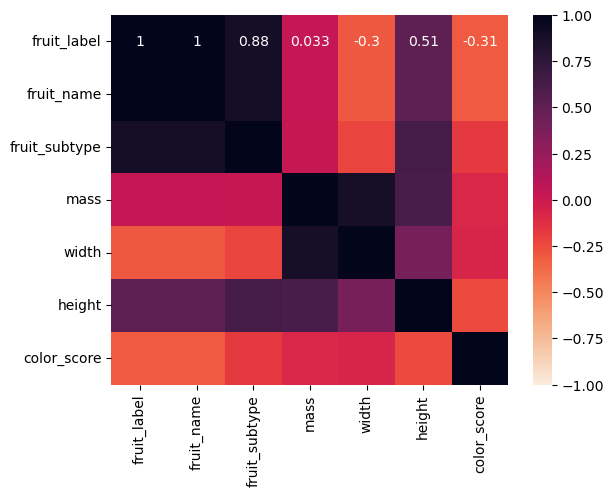

In [57]:
# pearson correlation
import pandas as pd
import numpy as np
from numpy import array 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# import category
%matplotlib inline

data = pd.read_csv('fruit_data.csv')
df = pd.DataFrame(data)


cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

scaler = StandardScaler() ## Z-score normalization
# fit and transform the data
normalized_data = scaler.fit_transform(df)
# create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

pearsoncorr = normalized_df.corr(method='pearson')
print(pearsoncorr)


# sb.heatmap(pearsoncorr, 
#             xticklabels=pearsoncorr.columns,
#             yticklabels=pearsoncorr.columns,
#             cmap='RdBu_r',
#             annot=True,
#             linewidth=0.5)

sb.heatmap(normalized_df.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

# sb.heatmap(pearsoncorr, annot=True)
# plt.show(sb)